In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from time import time

import plotly
#plotly.tools.set_credentials_file(username='cathyhax', api_key='COw0zzFdojAcwZdDIdtf')

import plotly.plotly as py
import plotly.graph_objs as go

from ratings.Elo import Elo
from ratings.helpers import log_loss
from ratings.helpers import squared_error

from ratings.Rate import Rate
from scipy import stats

### Data issues: 
2012/13 Bundesliga season starts in Jan 2013
2011/2012 Bundesliga season has a fixture in 2015

### Modelling Conclusions:
For Bundesliga:
- Logistic: Calculations completed in 70.774069 seconds with a log loss of 0.279777 and a mean squared error of 0.165505
- Five-thirty-eight: Calculations completed in 79.368154 seconds with a log loss of 0.279479 and a mean squared error of 0.165106
- seems like regressing to mean is not a good approach

- k of 20, h of 70, Sd=True seems to be a good setting for a lot of major leagues
- Glicko not as good as a well-tuned Elo?

In [2]:
fixtures = pd.read_csv('fixtures.csv')

In [3]:
#Use Champions League to test
fixtures_f = fixtures[(fixtures['league_name'] == 'Serie A') & (fixtures['country_name'] == 'Italy')]

In [4]:
rating = Rate()

In [5]:
#log_loss = []
#squared_error = []
#Sd_methods = ["Logistic", "Power", "538"]
#for method in Sd_methods:
#log_loss.append(bundesliga.log_loss)
#squared_error.append(bundesliga.squared_error)

#Calculations completed in 50.906233 seconds with a log loss of 0.277650 and a mean squared error of 0.165147 (k of 20, h of 70, Sd=True)
#Premier league: Calculations completed in 83.123719 seconds with a log loss of 0.268767 and a mean squared error of 0.150653 (k of 20, h of 70, Sd=True)

rating.calculate_elo(fixtures_f, K=20, h=50, Sd=True) 

Prepping data...
Starting calculations...


C:\Torneo\soccer-elo-rating\ratings\Rate.py:144: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Torneo\soccer-elo-rating\ratings\Rate.py:152: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Torneo\soccer-elo-rating\ratings\Rate.py:155: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Calculations completed in 87.711254 seconds with a log loss of 0.270773 and a mean squared error of 0.153896
All games tied: log loss of 0.301030 and a mean squared error of 0.186442; all games won by home team: log loss of 1.223405 and a mean squared error of 0.343343


In [6]:
1536.78
1535.6119529738112
print(np.mean(rating.ratings_fixtures['localteam_p']))
print(np.mean(rating.ratings_fixtures['visitorteam_p']))

0.5618903267498188
0.43810967325017974


In [120]:
fixtures_f.join(rating.ratings_fixtures)

,fixture_id,localteam_id,localteam_name,visitorteam_id,visitorteam_name,localteam_score,visitorteam_score,starting_datetime,league_name,country_name,fifa_name,season_name,outcome,visitorteam_outcome,localteam_p,localteam_post_r,localteam_r,visitorteam_p,visitorteam_post_r,visitorteam_r
898147,298785,397.0,Empoli,8271,Reggina,1,1,2008-01-12 17:00:00,Serie A,Italy,ITA,2007/2008,0.5,0.5,0.599397,1498.012064,1500.000000,0.400603,1501.987936,1500.000000
898260,298793,9133.0,Catania,625,Juventus,1,1,2008-01-12 19:30:00,Serie A,Italy,ITA,2007/2008,0.5,0.5,0.599397,1498.012064,1500.000000,0.400603,1501.987936,1500.000000
898470,298851,708.0,Atalanta,37,Roma,1,2,2008-01-13 14:00:00,Serie A,Italy,ITA,2007/2008,0.0,1.0,0.599397,1488.012064,1500.000000,0.400603,1511.987936,1500.000000
898464,298800,613.0,Torino,10714,Livorno,1,2,2008-01-13 14:00:00,Serie A,Italy,ITA,2007/2008,0.0,1.0,0.599397,1488.012064,1500.000000,0.400603,1511.987936,1500.000000
898465,298810,3691.0,Robur Siena,2930,Internazionale,2,3,2008-01-13 14:00:00,Serie A,Italy,ITA,2007/2008,0.0,1.0,0.599397,1488.012064,1500.000000,0.400603,1511.987936,1500.000000
898466,298818,522.0,Sampdoria,1216,Palermo,3,0,2008-01-13 14:00:00,Serie A,Italy,ITA,2007/2008,1.0,0.0,0.599397,1514.114005,1500.000000,0.400603,1485.885995,1500.000000
898467,298827,398.0,Parma,109,Fiorentina,1,2,2008-01-13 14:00:00,Serie A,Italy,ITA,2007/2008,0.0,1.0,0.599397,1488.012064,1500.000000,0.400603,1511.987936,1500.000000
898468,298833,43.0,Lazio,102,Genoa,1,2,2008-01-13 14:00:00,Serie A,Italy,ITA,2007/2008,0.0,1.0,0.599397,1488.012064,1500.000000,0.400603,1511.987936,1500.000000
898469,298842,585.0,Cagliari,346,Udinese,0,1,2008-01-13 14:00:00,Serie A,Italy,ITA,2007/2008,0.0,1.0,0.599397,1488.012064,1500.000000,0.400603,1511.987936,1500.000000
898689,298859,113.0,Milan,597,Napoli,5,2,2008-01-13 19:30:00,Serie A,Italy,ITA,2007/2008,1.0,0.0,0.599397,1514.114005,1500.000000,0.400603,1485.885995,1500.000000


### Distribution of Predictions

In [7]:
x = rating.ratings_fixtures['localteam_p'].values
y_tie = np.where(fixtures_f['outcome']==0.5, 1, 0)
y_home = np.where(fixtures_f['outcome']==1, 1, 0)
y_away = np.where(fixtures_f['outcome']==0, 1, 0)

In [8]:
nbins = 50
y_binned_h, x_bins_h = np.histogram(x, bins=nbins, weights=y_home)
y_total_h, x_bins_h = np.histogram(x, bins=nbins)

y_binned_a, x_bins_a = np.histogram(x, bins=nbins, weights=y_away)
y_total_a, x_bins_a = np.histogram(x, bins=nbins)

y_binned_t, x_bins_t = np.histogram(x, bins=nbins, weights=y_tie)
y_total_t, x_bins_t = np.histogram(x, bins=nbins)

In [9]:
mean_h = np.divide(y_binned_h, y_total_h)
mean_h[np.isnan(mean_h)]=0

mean_a = np.divide(y_binned_a, y_total_a)
mean_a[np.isnan(mean_a)]=0

mean_t = np.divide(y_binned_t, y_total_t)
mean_t[np.isnan(mean_t)]=0

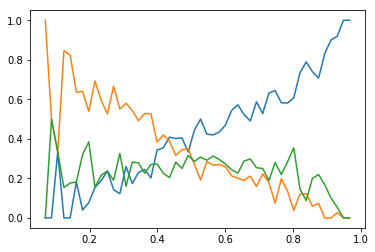

In [10]:
plt.plot(x_bins_h[1:], mean_h)
plt.plot(x_bins_a[1:], mean_a)
plt.plot(x_bins_t[1:], mean_t)

In [12]:
slope_h, i_h, r_h, p_h, std_err_h = stats.linregress(x_bins_h[1:],mean_h)
line_h = slope_h * x_bins_h[1:] + i_h

slope_a, i_a, r_a, p_a, std_err_a = stats.linregress(x_bins_a[1:],mean_a)
line_a = slope_a * x_bins_a[1:] + i_a

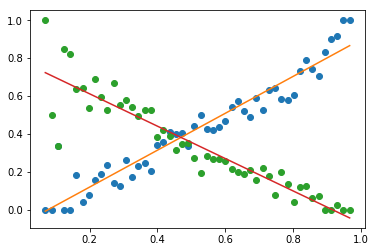

In [13]:
h = plt.plot(x_bins_h[1:], mean_h, 'o', x_bins_h[1:], line_h)
a = plt.plot(x_bins_a[1:], mean_a, 'o', x_bins_a[1:], line_a)

In [14]:
z = np.polyfit(x_bins_t[1:], mean_t, 3)
p = np.poly1d(z)

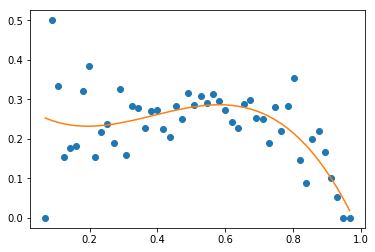

In [17]:
line = p(x_bins_t[1:])
plt.plot(x_bins_t[1:], mean_t ,'o', x_bins_t[1:], line)

In [18]:
def three_way_probability(p):
    p_home = slope_h * p + i_h
    p_away = slope_a * p + i_a
    p_tie = 1- p_home - p_away

    return p_home, p_away, p_tie

In [19]:
p_home, p_away, p_tie = three_way_probability(x)

In [20]:
print('The log loss of home wins is %f compared to a benchmark of %f' % (log_loss(y_home, p_home), log_loss(y_home, 0.33)))
print('The log loss of away wins is %f compared to a benchmark of %f' % (log_loss(y_away, p_away), log_loss(y_away, 0.33)))
print('The log loss error of ties is %f compared to a benchmark of %f' % (log_loss(y_tie, p_away), log_loss(y_tie, 0.33)))

The log loss of home wins is 0.274231 compared to a benchmark of 0.316993
The log loss of away wins is 0.233039 compared to a benchmark of 0.260227
The log loss error of ties is 0.275375 compared to a benchmark of 0.252117


### Predictive Power for latest set of matches

In [137]:
last_ratings = rating.ratings_teams_fixtures.groupby('team_id').last()
s = last_ratings['outcome'].values
p = last_ratings['team_p'].values

In [138]:
log_loss(s, p)

0.24635003200955796

# Graphing Results in Plot.ly

In [23]:
team_fixture_r = champions_league_elo.ratings_teams_fixtures

In [28]:
RM_fixture_r = team_fixture_r[team_fixture_r['team_name'] == 'Barcelona']

In [32]:
teams = team_fixture_r.team_name.unique()

In [46]:
data = []

for team in teams:
    team_data = team_fixture_r[team_fixture_r['team_name'] == team]
    team_trace = go.Scatter(
        x = team_data.order,
        y = team_data.team_r,
        name = team,
        opacity = 0.8)
    data.append(team_trace)

In [47]:
fig = dict(data = data)
py.iplot(data)